In [1]:
py_files_path = '../'
import sys
sys.path.append(py_files_path)

In [14]:
import pandas as pd
import json
from tqdm import tqdm
from collections import Counter

from datasets import build_vocab

In [15]:
file_path = '../dataset_flickr8k.json'
with open(file_path, 'r') as f:
    data = json.load(f)

In [16]:
df = pd.read_csv("../data.csv")
df.head()

,file_name,split,caption
0,2513260012_03d33305cf.jpg,train,A black dog is running after a white dog in th...
1,2513260012_03d33305cf.jpg,train,Black dog chasing brown dog through snow
2,2513260012_03d33305cf.jpg,train,Two dogs chase each other across the snowy gro...
3,2513260012_03d33305cf.jpg,train,Two dogs play together in the snow .
4,2513260012_03d33305cf.jpg,train,Two dogs running through a low lying body of w...


In [17]:
vocab = build_vocab('../data.csv')

In [18]:
capt = df['caption'][0]

In [19]:
vocab.tokenize_en(capt)

['a',
 'black',
 'dog',
 'is',
 'running',
 'after',
 'a',
 'white',
 'dog',
 'in',
 'the',
 'snow',
 '.']

In [37]:
file_names = []
splits = []
captions = []
tokens = []
tok_len = []
word_freq = Counter()
max_len = 100

for img in tqdm(data['images'], position=0):
    for sent in img['sentences']:
        file_names.append(img['filename'])
        captions.append(sent['raw'])
        splits.append(img['split'])
        
        ## tokens
        if len(sent['tokens']) <= max_len:
            tokens.append(sent['tokens'])
            tok_len.append(len(sent['tokens']))

100%|██████████| 8000/8000 [00:00<00:00, 167735.26it/s]


In [38]:
df = pd.DataFrame({
    'file_name': file_names,
    'split': splits,
    'caption': captions,
    'tok_len': tok_len,
    'tokens': tokens
})

In [39]:
df.head()

,file_name,split,caption,tok_len,tokens
0,2513260012_03d33305cf.jpg,train,A black dog is running after a white dog in th...,12,"[a, black, dog, is, running, after, a, white, ..."
1,2513260012_03d33305cf.jpg,train,Black dog chasing brown dog through snow,7,"[black, dog, chasing, brown, dog, through, snow]"
2,2513260012_03d33305cf.jpg,train,Two dogs chase each other across the snowy gro...,9,"[two, dogs, chase, each, other, across, the, s..."
3,2513260012_03d33305cf.jpg,train,Two dogs play together in the snow .,7,"[two, dogs, play, together, in, the, snow]"
4,2513260012_03d33305cf.jpg,train,Two dogs running through a low lying body of w...,10,"[two, dogs, running, through, a, low, lying, b..."


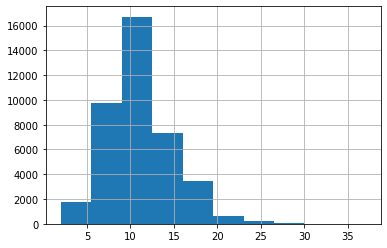

In [40]:
df.tok_len.hist()

In [41]:
df.to_csv("../data.csv", index=False)

In [42]:
df = pd.read_csv("../data.csv")
df.head()

,file_name,split,caption,tok_len,tokens
0,2513260012_03d33305cf.jpg,train,A black dog is running after a white dog in th...,12,"['a', 'black', 'dog', 'is', 'running', 'after'..."
1,2513260012_03d33305cf.jpg,train,Black dog chasing brown dog through snow,7,"['black', 'dog', 'chasing', 'brown', 'dog', 't..."
2,2513260012_03d33305cf.jpg,train,Two dogs chase each other across the snowy gro...,9,"['two', 'dogs', 'chase', 'each', 'other', 'acr..."
3,2513260012_03d33305cf.jpg,train,Two dogs play together in the snow .,7,"['two', 'dogs', 'play', 'together', 'in', 'the..."
4,2513260012_03d33305cf.jpg,train,Two dogs running through a low lying body of w...,10,"['two', 'dogs', 'running', 'through', 'a', 'lo..."
